# Exploratory Analysis of 2020-2022 Layoffs by Industry


## Downloading the Dataset

**Gather Data** - Let's analyze some data from kaggle. 

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/swaptr/layoffs-2022' 

In [4]:
#Download and import the dataset
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: husseink
Your Kaggle Key: ········


100%|██████████| 32.5k/32.5k [00:00<00:00, 25.2MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './layoffs-2022'

In [6]:
import os

In [7]:
os.listdir(data_dir)

['layoffs.csv']

In [8]:
project_name = "layoff-data-analysis" # change this (use lowercase letters and hyphens only)

In [9]:
# Install and Import Jovian to save progress
!pip install jovian --upgrade -q

In [10]:
import jovian

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zaneyhuss/layoff-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/zaneyhuss/layoff-project


'https://jovian.ai/zaneyhuss/layoff-project'

In [11]:
#Download pandas to clean the data
!pip install pandas --upgrade --quiet

In [12]:
import pandas as pd

## Data Preparation and Cleaning

Before analyzing, the data needs to be cleaned. By peforming the following, we can ensure, the data is valid.
- Remove duplicates
- Remove Nan
- Remove blank cells
- Remove data in with incorrect format
- Remove nonessential columns




In [13]:
# A snapshot of the dataframe 
layoff_df = pd.read_csv('layoffs.csv')
layoff_df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,ShareChat,Bengaluru,Consumer,100.0,NaN,2022-12-02,Unknown,India,1700.0
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
3,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
4,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
...,...,...,...,...,...,...,...,...,...
1718,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1719,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1720,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1721,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [14]:
#Initial shape of the data frame
layoff_df.shape

(1723, 9)

In [15]:
type(layoff_df)

pandas.core.frame.DataFrame

In [16]:
# Basic info
layoff_df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1212.000000,1154.000000,1599.000000
mean,197.605611,0.276948,870.630579
std,570.895768,0.267198,6402.561024
min,3.000000,0.000000,0.000000
25%,31.000000,0.100000,44.000000
50%,70.000000,0.190000,132.000000
75%,150.000000,0.330000,380.000000
max,11000.000000,1.000000,121900.000000


In [17]:
# All the columns in the data frame, We don't need all
layoff_df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [18]:
# Get an overview of the data, using .head() and .tail()
layoff_df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,ShareChat,Bengaluru,Consumer,100.0,NaN,2022-12-02,Unknown,India,1700.0
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
3,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
4,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
5,Yapily,London,Finance,NaN,NaN,2022-12-01,Series A,United Kingdom,69.0
6,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
7,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
8,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0
9,Ula,Jakarta,Retail,134.0,0.23,2022-11-30,Series B,Indonesia,140.0


In [19]:
layoff_df.tail(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1713,Tuft & Needle,Phoenix,Retail,NaN,NaN,2020-03-19,Acquired,United States,0.0
1714,Flytedesk,Boulder,Marketing,4.0,0.20,2020-03-18,Seed,United States,4.0
1715,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
1716,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
1717,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
1718,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1719,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1720,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1721,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0
1722,Homebound,SF Bay Area,Real Estate,NaN,NaN,NaN,Unknown,United States,128.0


In [20]:
# Return a dataframe without missing cells, inplace=True to change the original data frame, inplace=False to alter data frame
layoff_df.dropna(inplace = True)

print(layoff_df.to_string())

                            company         location        industry  total_laid_off  percentage_laid_off        date           stage               country  funds_raised
1                         Carousell        Singapore          Retail           110.0               0.1000  2022-12-01  Private Equity             Singapore      372.0000
2                           Bizzabo    New York City       Marketing           100.0               0.3700  2022-12-01        Series E         United States      194.0000
6                          DoorDash      SF Bay Area            Food          1250.0               0.0600  2022-11-30             IPO         United States     2500.0000
7                            Kraken      SF Bay Area          Crypto          1100.0               0.3000  2022-11-30         Unknown         United States      134.0000
8                       Happy Money      Los Angeles         Finance           158.0               0.3400  2022-11-30        Series D         United S

Companies with no layoffs were removed. We are only analyzing companies with data.

In [21]:
#Lets check the shape again
layoff_df.shape

(845, 9)

In [22]:
# Data frame only has usable data now
layoff_df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
6,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
7,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
8,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0
...,...,...,...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
1716,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
1718,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1719,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0


We don't need all the columns. Let's remove some unnecessary 

In [23]:
#Drop the columns, we won't use
layoff_df.drop(columns=['stage'], inplace=True)

In [24]:
layoff_df.drop(columns=['funds_raised'], inplace=True)

In [25]:
layoff_df.drop(columns=['percentage_laid_off'], inplace=True)

In [26]:
# Unnessary columns are removed
layoff_df

,company,location,industry,total_laid_off,date,country
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States
1716,Help.com,Austin,Support,16.0,2020-03-16,United States
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States


In [27]:
layoff_df.shape

(845, 6)

In [28]:
# Format the dates
layoff_df['date'] = pd.to_datetime(layoff_df['date'])
print(layoff_df.to_string())

                            company         location        industry  total_laid_off       date               country
1                         Carousell        Singapore          Retail           110.0 2022-12-01             Singapore
2                           Bizzabo    New York City       Marketing           100.0 2022-12-01         United States
6                          DoorDash      SF Bay Area            Food          1250.0 2022-11-30         United States
7                            Kraken      SF Bay Area          Crypto          1100.0 2022-11-30         United States
8                       Happy Money      Los Angeles         Finance           158.0 2022-11-30         United States
9                               Ula          Jakarta          Retail           134.0 2022-11-30             Indonesia
10                           Wonder    New York City            Food           130.0 2022-11-30         United States
11                             Ualá     Buenos Aires    

We don't have to worry about organizing the data by date, Python took care of that.

In [29]:
layoff_df

,company,location,industry,total_laid_off,date,country
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States
1716,Help.com,Austin,Support,16.0,2020-03-16,United States
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States


In [30]:
#Make sure the dataframe is cleaned, lets grab a sample
layoff_df.sample(5)

,company,location,industry,total_laid_off,date,country
20,CoinJar,Melbourne,Crypto,10.0,2022-11-29,Australia
1223,Loftium,Seattle,Real Estate,32.0,2020-05-29,United States
664,Gopuff,Philadelphia,Food,1500.0,2022-07-12,United States
658,Involves,Florianópolis,Retail,70.0,2022-07-13,Brazil
393,Kuda,Lagos,Finance,23.0,2022-09-02,Nigeria


The sample looks good and all the data looks valid. Now we can explore!

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
# Import matplot and seaborn to create visualizations of our data
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
#Let's see which companies had the most layoffs
most_layoffs = layoff_df.sort_values('total_laid_off', ascending=False).head(10)

In [33]:
most_layoffs

,company,location,industry,total_laid_off,date,country
140,Meta,SF Bay Area,Consumer,11000.0,2022-11-09,United States
77,Amazon,Seattle,Retail,10000.0,2022-11-16,United States
78,Cisco,SF Bay Area,Infrastructure,4100.0,2022-11-16,United States
1295,Uber,SF Bay Area,Transportation,3700.0,2020-05-06,United States
169,Twitter,SF Bay Area,Consumer,3700.0,2022-11-04,United States
1250,Uber,SF Bay Area,Transportation,3000.0,2020-05-18,United States
1026,Better.com,New York City,Real Estate,3000.0,2022-03-08,United States
1450,Groupon,Chicago,Retail,2800.0,2020-04-13,United States
1039,Peloton,New York City,Fitness,2800.0,2022-02-08,United States
967,Carvana,Phoenix,Transportation,2500.0,2022-05-10,United States


Hmm. Uber seems to have made the list twice. Lets fix that!

In [34]:
layoff_comb = layoff_df.groupby('company')[['total_laid_off']].sum()

In [35]:
print(layoff_comb.to_string())

                               total_laid_off
company                                      
&Open                                     9.0
10X Genomics                            100.0
1stdibs                                  70.0
2TM                                     190.0
54gene                                   95.0
6sense                                  150.0
99                                       75.0
Abra                                     12.0
Acast                                    70.0
Acko                                     45.0
AdRoll                                  210.0
Ada                                      78.0
Ada Support                              36.0
Adaptive Biotechnologies                100.0
Ahead                                    44.0
Airbnb                                 1900.0
Airtime                                  30.0
Ajaib                                    67.0
AlayaCare                                80.0
Albert                            

Now lets organize by quantity 

In [36]:
most_lay = layoff_comb.sort_values('total_laid_off', ascending=False).head(10)

In [37]:
# Meta scores 1st for most employee's laid off.

most_lay

,total_laid_off
company,
Meta,11000.0
Amazon,10000.0
Uber,7525.0
Cisco,4100.0
Peloton,4084.0
Carvana,4000.0
Better.com,3900.0
Twitter,3700.0
Groupon,3300.0


## Exploratory Analysis and Visualization


**Get familiar with the data** - Now that the data is clean we can begin having some fun. 


**Average by Industry** - Lets collect the averages by industry. Which industry has the most and which one has the least?

In [38]:
layoff_df

,company,location,industry,total_laid_off,date,country
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States
1716,Help.com,Austin,Support,16.0,2020-03-16,United States
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States


In [39]:
# Average layoff by industry
layoff_avg_df=layoff_df.groupby('industry')[['total_laid_off']].mean()
layoff_avg_df

,total_laid_off
industry,
Aerospace,197.000000
Construction,417.777778
Consumer,584.775000
Crypto,216.500000
Data,75.038462
Education,198.382353
Energy,65.666667
Finance,126.554622
Fitness,547.866667


In [41]:
# Sum of Layoffs by Industry
layoff_sum=layoff_df.groupby('industry')[['total_laid_off']].sum()
layoff_sum

,total_laid_off
industry,
Aerospace,591.0
Construction,3760.0
Consumer,23391.0
Crypto,6928.0
Data,1951.0
Education,6745.0
Energy,197.0
Finance,15060.0
Fitness,8218.0


In [42]:
lay_sum=layoff_sum.sort_values('total_laid_off', ascending=False).head(10)

In [43]:
lay_off = lay_sum.head(5)

Text(0.5, 1.0, 'Industries w/ Highest Layoffs')

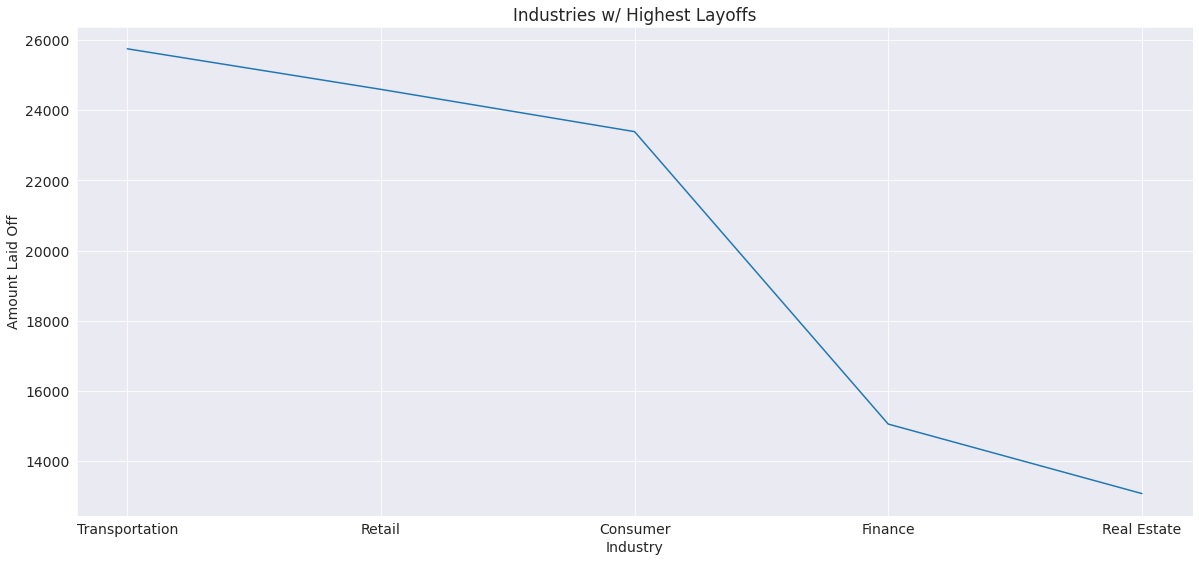

In [44]:
plt.figure(figsize=(20,9))
plt.plot(lay_off)
plt.xlabel('Industry')
plt.ylabel('Amount Laid Off')
plt.title("Industries w/ Highest Layoffs")

**Transportation** takes the lead for most lay-offs

In [45]:
lay_ls=layoff_sum.sort_values('total_laid_off', ascending=False).tail(5)

In [46]:
lay_ls

,total_laid_off
industry,
HR,998.0
Aerospace,591.0
Product,514.0
Legal,290.0
Energy,197.0


Text(0.5, 1.0, 'Industries w/ Least Layoffs')

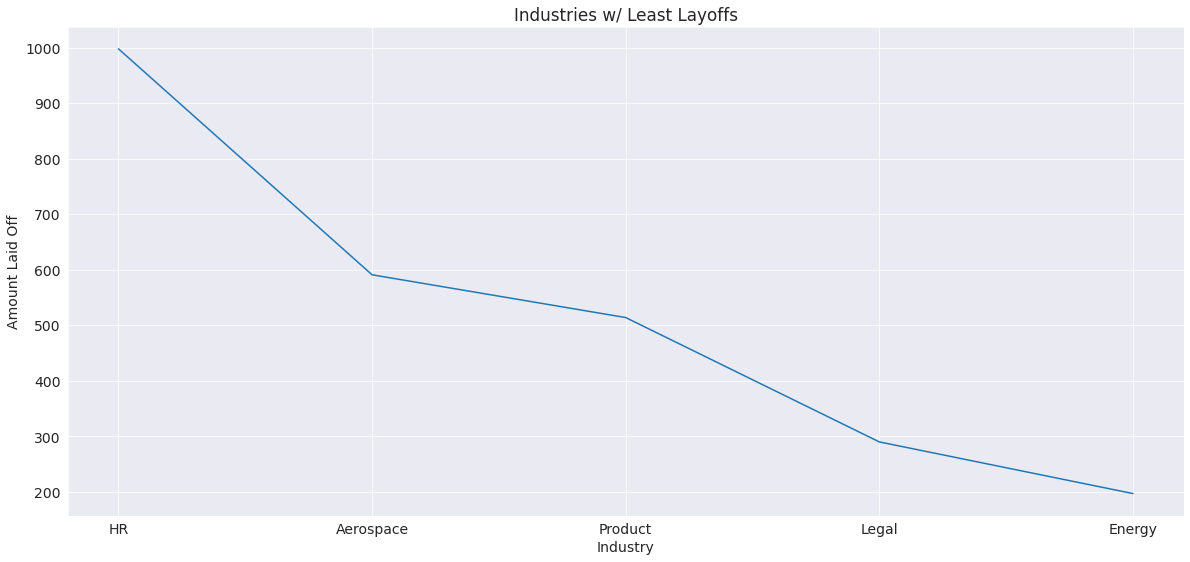

In [47]:
# Let's find the sum of the industries with the least layoffs
plt.figure(figsize=(20,9))
plt.plot(lay_ls)
plt.xlabel('Industry')
plt.ylabel('Amount Laid Off')
plt.title("Industries w/ Least Layoffs")

**Energy** has the least layoffs

**Layoff by City** - Let's collect data from countries.

In [48]:
# City's with the most layoffs
city_layoff=layoff_df['location'].value_counts()
city_layoff.head(10)

SF Bay Area      232
New York City     99
Boston            39
Los Angeles       33
Seattle           32
Bengaluru         31
Toronto           30
London            26
Sao Paulo         26
Tel Aviv          24
Name: location, dtype: int64

Companies out of **San Francisco Bay Area**, have the most layoffs

 ## **Compare Countries** 

**Find which countries had the most and least** 

In [49]:
#Compare countries with the highest layoffs
layoffcon=layoff_df.groupby('country')[['total_laid_off']].sum()
layoffcon

,total_laid_off
country,
Argentina,233.0
Australia,856.0
Austria,270.0
Brazil,4651.0
Canada,4034.0
China,480.0
Denmark,185.0
Estonia,206.0
Finland,250.0


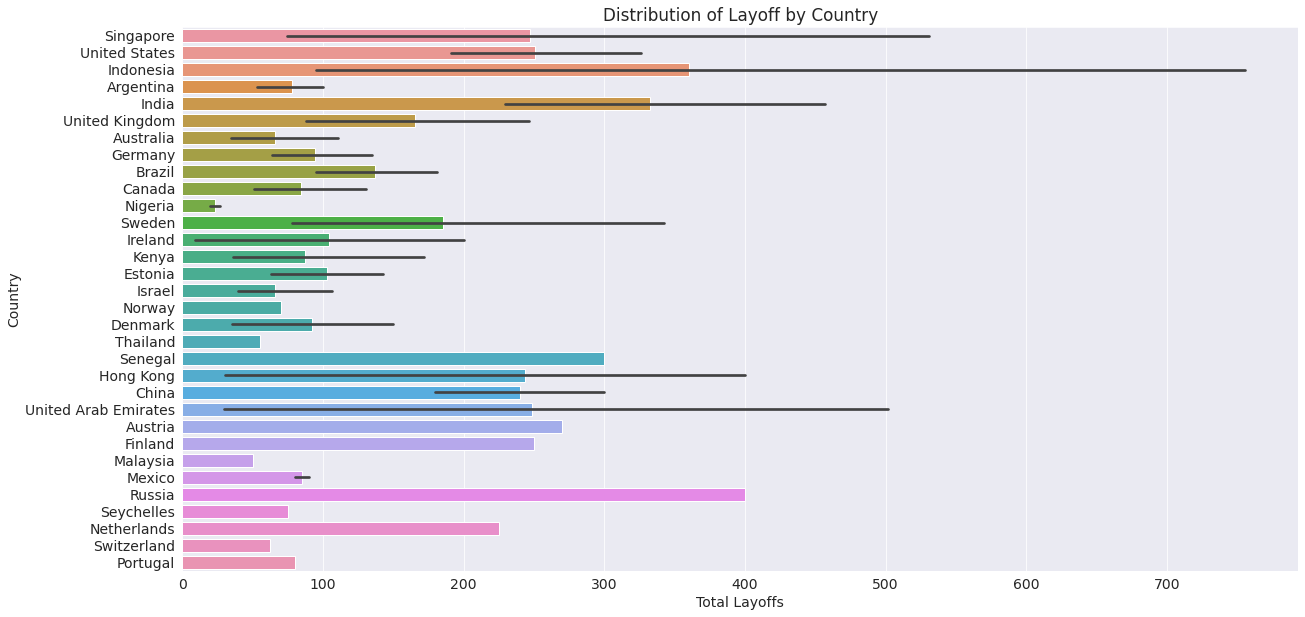

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x='total_laid_off', y='country', data=layoff_df)
plt.xlabel('Total Layoffs')
plt.ylabel('Country')
plt.title("Distribution of Layoff by Country");

**United States** has the most layoffs and **Nigeria** has the least

In [51]:
#Snapshot, What type of other data should we visualize?
layoff_df

,company,location,industry,total_laid_off,date,country
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States
...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States
1716,Help.com,Austin,Support,16.0,2020-03-16,United States
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States


We've seen the countries and industries with the most layoffs, let's see if the data can give us predictions
- Get the Industries with the most layoffs overall
- Collect the averages and graph
- Organize the data by year
What conclusions can we make?

In [52]:
# Let's use the datatype datetime64 to make seperate columns for just the dates
layoff_df['year'] = pd.DatetimeIndex(layoff_df.date).year
layoff_df['month'] = pd.DatetimeIndex(layoff_df.date).month

In [53]:
# Industries to draw conclusions for.
lay_off

,total_laid_off
industry,
Transportation,25751.0
Retail,24595.0
Consumer,23391.0
Finance,15060.0
Real Estate,13080.0


In [54]:
# Give each industry their own df

transp_df = layoff_df[layoff_df.industry == 'Transportation']
retail_df = layoff_df[layoff_df.industry == 'Retail']
cons_df = layoff_df[layoff_df.industry == 'Consumer']
fina_df = layoff_df[layoff_df.industry == 'Finance']
re_df = layoff_df[layoff_df.industry == 'Real Estate']

In [55]:
transp_df

,company,location,industry,total_laid_off,date,country,year,month
41,Carwow,London,Transportation,70.0,2022-11-25,United Kingdom,2022,11
58,Carvana,Phoenix,Transportation,1500.0,2022-11-18,United States,2022,11
59,Nuro,SF Bay Area,Transportation,300.0,2022-11-18,United States,2022,11
127,GoTo Group,Jakarta,Transportation,1300.0,2022-11-10,Indonesia,2022,11
177,Lyft,SF Bay Area,Transportation,700.0,2022-11-03,United States,2022,11
307,Spin,SF Bay Area,Transportation,78.0,2022-09-30,United States,2022,9
334,99,Sao Paulo,Transportation,75.0,2022-09-20,Brazil,2022,9
429,Tier Mobility,Berlin,Transportation,180.0,2022-08-23,Germany,2022,8
581,Rivian,Detroit,Transportation,840.0,2022-07-27,United States,2022,7
609,Rad Power Bikes,Seattle,Transportation,63.0,2022-07-21,United States,2022,7


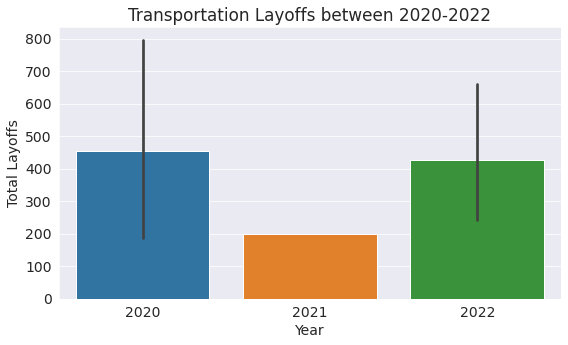

In [56]:
# Make a graph for the industries from above and put them on the same page


sns.barplot(x='year', y='total_laid_off', data=transp_df)
plt.xlabel('Year')
plt.ylabel('Total Layoffs')
plt.title("Transportation Layoffs between 2020-2022");

Let's combine all the graphs so we can compare this transportation data with the other industries

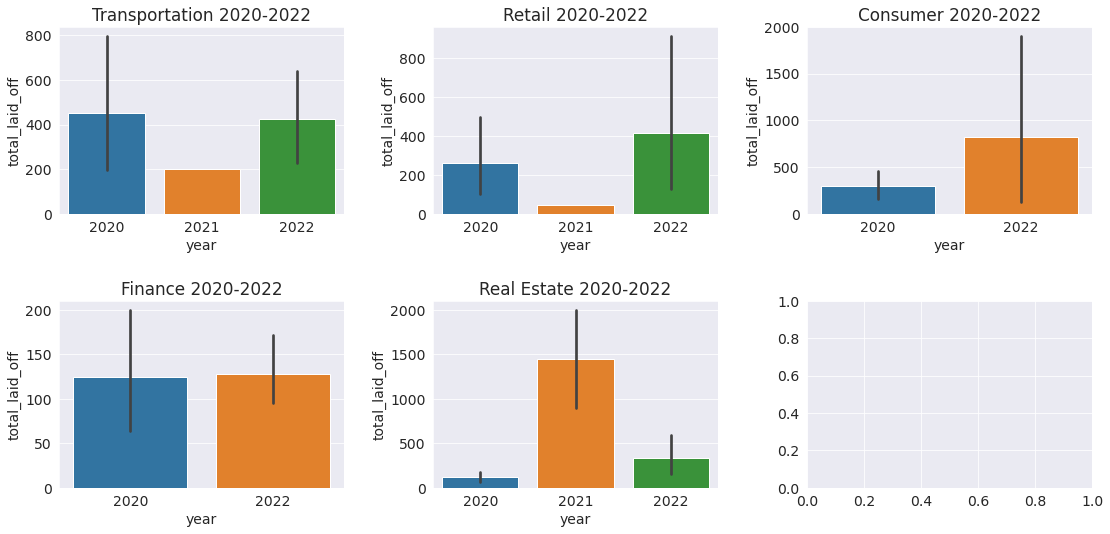

In [57]:
# Put all the graphs together



fig, axes = plt.subplots(2, 3, figsize=(16, 8))


# Transportation
axes[0,0].set_title('Transportation 2020-2022')
sns.barplot(x='year', y='total_laid_off', data=transp_df,ax=axes[0,0]);

#Retail
axes[0,1].set_title('Retail 2020-2022')
sns.barplot(x='year', y='total_laid_off', data=retail_df, ax=axes[0,1]);

#Consumer
axes[0,2].set_title('Consumer 2020-2022')
sns.barplot(x='year', y='total_laid_off', data=cons_df, ax=axes[0,2]);

#Finance
axes[1,0].set_title('Finance 2020-2022')
sns.barplot(x='year', y='total_laid_off', data=fina_df, ax=axes[1,0]);

#Real Estate
axes[1,1].set_title('Real Estate 2020-2022')
sns.barplot(x='year', y='total_laid_off', data=re_df, ax=axes[1,1]);

plt.tight_layout(pad=2);


## Trends
Let's make some inferences from the graphs above. 

- **Finance** and **Consumer** had no layoffs the entire year of 2021. 
- Finance had the least layoffs of 2020.
- Real Estate had minimal layoffs this year, next year, they could have an increase in layoffs again. We'd have to study data from more previous years to make a conclusion. 
- Transportation and Retail follow similar patterns, dramatic distributions in the results.
- Consumer has the most dramatic trends, in 2022 they laid off 2x the layoffs compared to 2020. The industry could be making up for an influx of employees and the lack layoffs in 2021 might have triggered the dramatic layoffs.  

Pull data from the top 10 industries, compare data from 2020-2022 and make an inference. 

In [58]:
#Unique variables from each column
layoff_df.nunique()

company           749
location           97
industry           27
total_laid_off    202
date              292
country            32
year                3
month              12
dtype: int64

In [59]:
# Average for U.S.
layoff_df[layoff_df.country == "United States"].total_laid_off.mean()

250.4025500910747

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

We've cleaned, sorted and visualized our data. Get into the nitty gritty, What can we further analyze? 
- Find the Median.
- Find the mean for each month.
- Which year had the highest layoffs?
- Choose a country and compare results to the U.S.
- Find data only from this year, 2022.


#### Q1: What is the median for layoffs?

In [60]:
# Pull up df with only country totals
layoffcon

,total_laid_off
country,
Argentina,233.0
Australia,856.0
Austria,270.0
Brazil,4651.0
Canada,4034.0
China,480.0
Denmark,185.0
Estonia,206.0
Finland,250.0


In [61]:
# Organize the rows
layoffcon_df=layoffcon.sort_values('total_laid_off', ascending=False).head(10)

In [62]:
layoffcon_df['total_laid_off'].median()

3748.5

#### Q2: Find the mean for each month.

In [63]:
layoff_df

,company,location,industry,total_laid_off,date,country,year,month
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore,2022,12
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States,2022,12
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States,2022,11
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States,2022,11
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States,2022,11
...,...,...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States,2020,3
1716,Help.com,Austin,Support,16.0,2020-03-16,United States,2020,3
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States,2020,3
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States,2020,3


In [64]:
mon_avg_df=layoff_df.groupby('month')[['total_laid_off']].mean()
mon_avg_df

,total_laid_off
month,
1,149.000000
2,406.333333
3,167.928571
4,145.152439
5,296.263636
6,164.801418
7,145.000000
8,170.095890
9,104.219512


Text(0.5, 1.0, 'Average Layoff by Month 2020-2022')

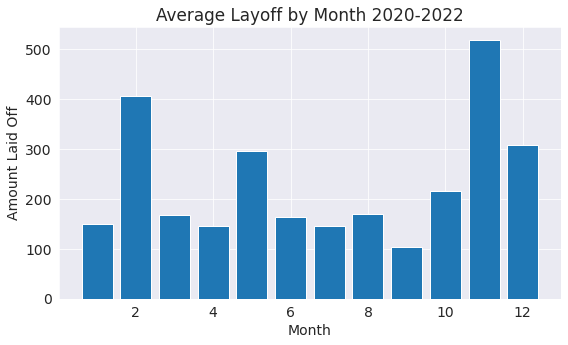

In [65]:
plt.bar(mon_avg_df.index, mon_avg_df.total_laid_off)
plt.xlabel('Month')
plt.ylabel('Amount Laid Off')
plt.title("Average Layoff by Month 2020-2022")

On average, the highest layoffs occurred during November.

#### Q3: Which year had the most layoffs? Which one had the least?

In [66]:
layoff_df

,company,location,industry,total_laid_off,date,country,year,month
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore,2022,12
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States,2022,12
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States,2022,11
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States,2022,11
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States,2022,11
...,...,...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States,2020,3
1716,Help.com,Austin,Support,16.0,2020-03-16,United States,2020,3
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States,2020,3
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States,2020,3


In [67]:
# Month and year already have their own columns, let's see the visualization
layoff_df

,company,location,industry,total_laid_off,date,country,year,month
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore,2022,12
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States,2022,12
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States,2022,11
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States,2022,11
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States,2022,11
...,...,...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States,2020,3
1716,Help.com,Austin,Support,16.0,2020-03-16,United States,2020,3
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States,2020,3
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States,2020,3


Text(0.5, 1.0, 'Average Layoff 2020-2022')

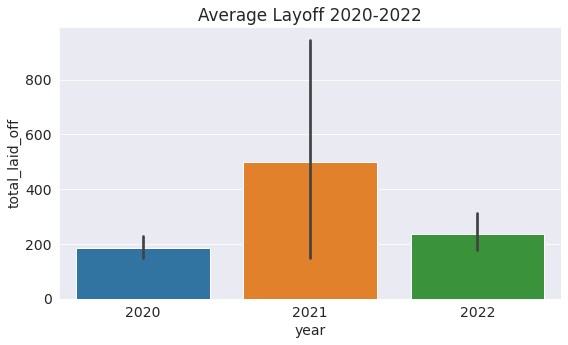

In [68]:
sns.barplot(x='year', y='total_laid_off', data=layoff_df);
plt.title("Average Layoff 2020-2022")

**2021** had the most layoffs and **2020** had the least.

#### Q4: Identify the total layoffs for Senegal compared to the U.S.

In [69]:
layoff_df

,company,location,industry,total_laid_off,date,country,year,month
1,Carousell,Singapore,Retail,110.0,2022-12-01,Singapore,2022,12
2,Bizzabo,New York City,Marketing,100.0,2022-12-01,United States,2022,12
6,DoorDash,SF Bay Area,Food,1250.0,2022-11-30,United States,2022,11
7,Kraken,SF Bay Area,Crypto,1100.0,2022-11-30,United States,2022,11
8,Happy Money,Los Angeles,Finance,158.0,2022-11-30,United States,2022,11
...,...,...,...,...,...,...,...,...
1715,Inspirato,Denver,Travel,130.0,2020-03-16,United States,2020,3
1716,Help.com,Austin,Support,16.0,2020-03-16,United States,2020,3
1718,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States,2020,3
1719,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States,2020,3


In [70]:
#Give both countries their own df
senegal_df = layoff_df[layoff_df.country == 'Senegal']
us_df = layoff_df[layoff_df.country == 'United States']

In [71]:
# Only 1 company in Senegal had layoffs totalling 300
senegal_df

,company,location,industry,total_laid_off,date,country,year,month
653,Wave,Dakar,Finance,300.0,2022-07-13,Senegal,2022,7


In [72]:
# The U.S. had 137471.0
us_df.total_laid_off.sum()

137471.0

#### Q5:Make a data frame with only data from 2022 and graph results.

In [73]:
#Make a df of data from 2022
new_df = layoff_df[layoff_df.year == 2022]

Text(0.5, 1.0, '2022 Layoff Summary')

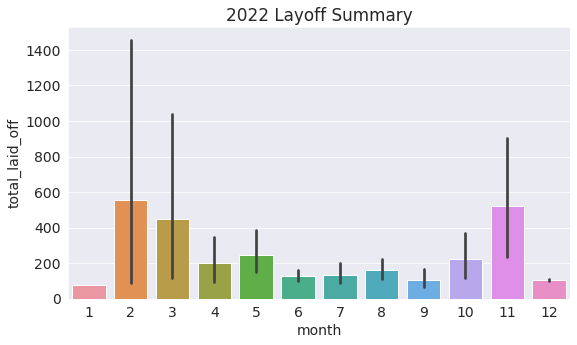

In [74]:
sns.barplot(x='month', y='total_laid_off', data=new_df);
plt.title("2022 Layoff Summary")

The most layoffs occurred during February and the least occur in January. 

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion
**We cleaned and analyzed the data. Here are some inferences made from the data.** 

- Energy and Legal have less than 300 layoffs from 2020-2022.
- Consumer has the most dramatic trends, in 2022 they laid off 2x the layoffs compared to 2020. The industry could be making up for an influx of employees and the lack layoffs in 2021 might have triggered the dramatic layoffs.
- On average, the most layoffs happen during November, based on the data in 2022, the most layoffs occurred in February.
- Some industries didn't have layoffs at all in 2021, but this year had the most layoffs overall.
- Based on the data, Russia had the most layoffs, while Nigeria had the least. 
A conclusion I hoped to draw when I analyzed the data was find the best industry to enter when switching careers or industry with the least layoffs overall. 
After analyzing the data, a conclusion cannot be drawn about which industry is likely to have the least layoffs or breakthrough. There are factors that need to be drawn when studying the data, such as inflation, Employee shortage in the industry, or worldwide pandemics. I conclude that further research will make it easier to draw a conclusion. 

## References and Future Work

- Kaggle Layoffs Dataset: https://www.kaggle.com/datasets/swaptr/layoffs-2022
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zaneyhuss/layoff-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/zaneyhuss/layoff-project


'https://jovian.ai/zaneyhuss/layoff-project'